https://www.kaggle.com/datasets/gorororororo23/plant-growth-data-classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("plant_growth_data.csv")

In [3]:
df.isnull().sum()

Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.head(8)

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0
5,sandy,8.627622,bi-weekly,none,20.004858,67.618726,0
6,loam,4.444268,daily,organic,25.984533,69.578952,1
7,clay,6.150794,daily,organic,29.291918,69.480907,0


In [6]:
df["Soil_Type"].value_counts()

Soil_Type
clay     67
sandy    64
loam     62
Name: count, dtype: int64

In [7]:
df["Fertilizer_Type"].value_counts()

Fertilizer_Type
none        74
chemical    65
organic     54
Name: count, dtype: int64

In [8]:
df["Water_Frequency"].value_counts()

Water_Frequency
daily        74
bi-weekly    60
weekly       59
Name: count, dtype: int64

In [9]:
X = df.drop("Growth_Milestone", axis = 1)
y = df.Growth_Milestone

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [11]:
pt = PowerTransformer()

In [12]:
#X_train[["Sunlight_Hours", "Temperature", "Humidity"]] = pt.fit_transform(X_train[["Sunlight_Hours", "Temperature", "Humidity"]])
#X_test[["Sunlight_Hours", "Temperature", "Humidity"]] = pt.transform(X_test[["Sunlight_Hours", "Temperature", "Humidity"]])

In [13]:
X_train

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity
126,clay,7.318000,weekly,none,22.300000,68.500000
29,loam,4.188575,bi-weekly,organic,23.677033,48.532107
172,loam,5.813000,bi-weekly,none,26.000000,60.200000
56,loam,9.164383,daily,none,17.015560,30.607724
51,sandy,5.908021,weekly,none,22.722053,48.743529
...,...,...,...,...,...,...
106,loam,5.229000,bi-weekly,organic,24.700000,52.100000
14,clay,5.951100,weekly,none,23.392001,47.545751
92,sandy,7.214648,weekly,none,22.784034,75.546359
179,sandy,5.233000,daily,organic,31.800000,47.900000


In [14]:
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

In [15]:
X_train

,Sunlight_Hours,Temperature,Humidity,Soil_Type_loam,Soil_Type_sandy,Water_Frequency_daily,Water_Frequency_weekly,Fertilizer_Type_none,Fertilizer_Type_organic
126,7.318000,22.300000,68.500000,False,False,False,True,True,False
29,4.188575,23.677033,48.532107,True,False,False,False,False,True
172,5.813000,26.000000,60.200000,True,False,False,False,True,False
56,9.164383,17.015560,30.607724,True,False,True,False,True,False
51,5.908021,22.722053,48.743529,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...
106,5.229000,24.700000,52.100000,True,False,False,False,False,True
14,5.951100,23.392001,47.545751,False,False,False,True,True,False
92,7.214648,22.784034,75.546359,False,True,False,True,True,False
179,5.233000,31.800000,47.900000,False,True,True,False,False,True


In [16]:
cols_bool = X_train.select_dtypes("bool").columns.to_list()
for col in cols_bool:
    X_train[col] = X_train[col].map({True : 1, False : 0})
    X_test[col] = X_test[col].map({True : 1, False : 0})

In [17]:
lr = LogisticRegressionCV(n_jobs = -1)
lr.fit(X_train, y_train)

LogisticRegressionCV(n_jobs=-1)

In [18]:
lr.C_

array([0.35938137])

<Axes: >

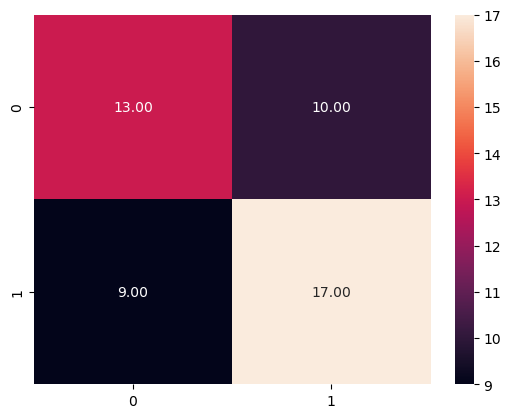

In [19]:
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test)), annot = True, fmt = ".2f")

In [20]:
rfr = RandomForestClassifier(n_jobs = -1)
rfr.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

<Axes: >

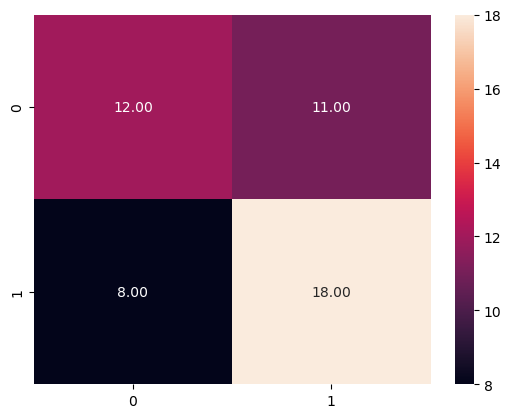

In [21]:
sns.heatmap(confusion_matrix(y_test, rfr.predict(X_test)), annot = True, fmt = ".2f")

In [22]:
estimators = [
    ("abc", AdaBoostClassifier(estimator = LogisticRegression(), n_estimators = 100)),
    ("gbc", GradientBoostingClassifier()),
    ("etc", ExtraTreesClassifier()),
    ("rfr", RandomForestClassifier()),
    ("bc", BaggingClassifier()),
    ("xgb", XGBClassifier()),
    ("lgbm", LGBMClassifier()),
    ("cbc", CatBoostClassifier())
]

In [23]:
meta_model = XGBClassifier()
sc = StackingClassifier(estimators = estimators, final_estimator = meta_model, n_jobs = -1)
sc.fit(X_train, y_train)

StackingClassifier(estimators=[('abc',
                                AdaBoostClassifier(estimator=LogisticRegression(),
                                                   n_estimators=100)),
                               ('gbc', GradientBoostingClassifier()),
                               ('etc', ExtraTreesClassifier()),
                               ('rfr', RandomForestClassifier()),
                               ('bc', BaggingClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsa...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...),
                   n_jobs=-1)

<Axes: >

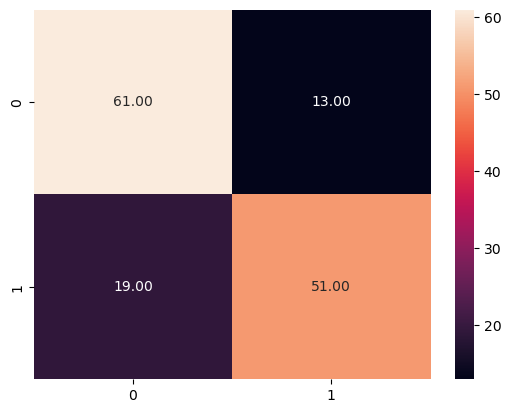

In [24]:
sns.heatmap(confusion_matrix(y_train, sc.predict(X_train)), annot = True, fmt = ".2f")

In [25]:
abc = AdaBoostClassifier(estimator = XGBClassifier(tree_method = "gpu_hist", gpu_id = 0))
param_grid = {
    "n_estimators" : [60, 100],
    "learning_rate" : [0.1, 0.01]
}
sc_cv = GridSearchCV(abc, param_grid = param_grid, cv = 2, n_jobs = -1)

In [26]:
sc_cv.fit(X_train, y_train)

E:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
E:\Anaconda\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:21:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)
E:\Anaconda\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:21:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, Us

GridSearchCV(cv=2,
             estimator=AdaBoostClassifier(estimator=XGBClassifier(base_score=None,
                                                                  booster=None,
                                                                  callbacks=None,
                                                                  colsample_bylevel=None,
                                                                  colsample_bynode=None,
                                                                  colsample_bytree=None,
                                                                  device=None,
                                                                  early_stopping_rounds=None,
                                                                  enable_categorical=False,
                                                                  eval_metric=None,
                                                                  feature_types=None,
                                                                  gamma=None,
                                                                  gpu_id=0,
                                                                  grow_policy=None,
                                                                  importance_type=None,
                                                                  interactio...ts=None,
                                                                  learning_rate=None,
                                                                  max_bin=None,
                                                                  max_cat_threshold=None,
                                                                  max_cat_to_onehot=None,
                                                                  max_delta_step=None,
                                                                  max_depth=None,
                                                                  max_leaves=None,
                                                                  min_child_weight=None,
                                                                  missing=nan,
                                                                  monotone_constraints=None,
                                                                  multi_strategy=None,
                                                                  n_estimators=None,
                                                                  n_jobs=None,
                                                                  num_parallel_tree=None, ...)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01],
                         'n_estimators': [60, 100]})

In [27]:
sc_cv.best_score_

0.5138888888888888

In [28]:
sc_best = sc_cv.best_estimator_
sc_best.fit(X_train, y_train)

E:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
E:\Anaconda\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:21:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
E:\Anaconda\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:21:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA

AdaBoostClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=0,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   learning_rate=0.1, n_estimators=60)

In [29]:
cols_cat = df.select_dtypes(include = "object").columns.to_list()
for col in cols_cat:
    print(df[col].value_counts)

<bound method IndexOpsMixin.value_counts of 0       loam
1      sandy
2       loam
3       loam
4      sandy
       ...  
188    sandy
189     clay
190     loam
191    sandy
192     clay
Name: Soil_Type, Length: 193, dtype: object>
<bound method IndexOpsMixin.value_counts of 0      bi-weekly
1         weekly
2      bi-weekly
3      bi-weekly
4      bi-weekly
         ...    
188        daily
189       weekly
190    bi-weekly
191        daily
192       weekly
Name: Water_Frequency, Length: 193, dtype: object>
<bound method IndexOpsMixin.value_counts of 0      chemical
1       organic
2          none
3          none
4       organic
         ...   
188        none
189    chemical
190        none
191     organic
192        none
Name: Fertilizer_Type, Length: 193, dtype: object>
